In [1]:
import pandas as pd

In [2]:
lithology_df=pd.read_csv(r'D:\ONGC project\finallll\combined_df_lithology.csv')

In [3]:
lithology_df

,TopDepth,BotDepth,_CAL,_GR,_SP,_LLD,_LLS,_AC,_DEN,_PEF,Lith_Section
0,999.40,1000.60,8.45417,90.9256,-23.2434,11.05550,10.46730,98.6481,2.10470,0.076631,siltstone
1,1000.60,1002.00,8.80133,108.8170,-19.9529,8.39451,8.57109,92.7234,2.34552,0.096388,mudstone
2,1002.00,1010.20,8.55694,62.4191,-31.7988,15.34740,14.67830,100.6360,2.09713,0.188259,siltstone
3,1010.20,1017.60,9.70622,114.2540,-15.4656,6.73380,6.51246,95.9030,2.38460,0.279541,mudstone
4,1017.60,1020.00,9.27884,81.7255,-23.4153,10.71210,9.63321,96.9341,2.17026,0.296863,siltstone
...,...,...,...,...,...,...,...,...,...,...,...
7465,2052.33,2052.89,8.84020,95.6815,-13.1131,6.48417,6.60710,72.8802,2.55753,-0.069701,mudstone
7466,2052.89,2053.33,8.84070,95.6815,-13.1113,8.09886,6.66683,72.8890,2.55957,-0.007026,mudstone
7467,2053.33,2053.77,8.83839,95.6815,-13.1114,14.01430,18.86530,72.8805,2.58128,0.009038,muddy siltstone
7468,2053.77,2055.66,8.83146,95.6815,-13.1101,8.48633,4.01874,72.8779,2.54329,0.239413,mudstone


In [5]:
# Basic statistics of the dataset
print(lithology_df.describe())

          TopDepth     BotDepth         _CAL          _GR          _SP  \
count  7470.000000  7470.000000  7470.000000  7470.000000  7470.000000   
mean   1803.702829  1805.023647     9.316698   108.038393    -9.207900   
std     287.782026   287.571615     0.737949    16.775717     8.011636   
min     999.400000  1000.600000    -0.558118   -86.809700   -57.263100   
25%    1637.700000  1639.082500     8.827845    98.725500   -14.602025   
50%    1829.260000  1830.330000     9.080895   109.278500   -10.450600   
75%    2013.632500  2014.937500     9.740285   117.812000    -3.745073   
max    2384.850000  2385.870000    13.165500   281.861000    16.304700   

              _LLD         _LLS          _AC         _DEN         _PEF  
count  7470.000000  7470.000000  7470.000000  7470.000000  7470.000000  
mean     12.720103    12.768499    81.348994     2.424630     0.387226  
std       9.399133     9.350825    13.483099     0.123808     0.304100  
min    -243.385000    -3.535470    42.333

checking for outliers!

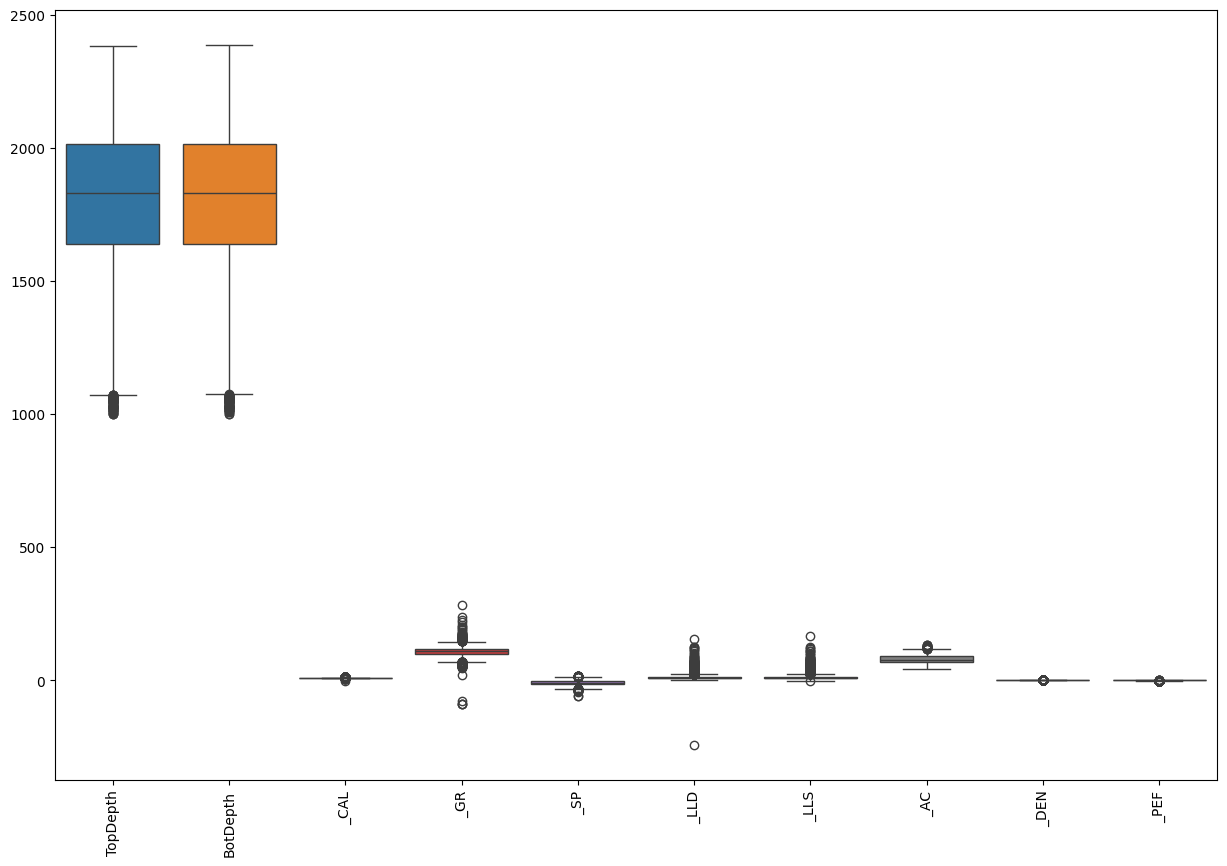

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot box plots for each numeric column
plt.figure(figsize=(15, 10))
sns.boxplot(data=lithology_df[['TopDepth', 'BotDepth', '_CAL', '_GR', '_SP', '_LLD', '_LLS', '_AC', '_DEN', '_PEF']])
plt.xticks(rotation=90)
plt.show()

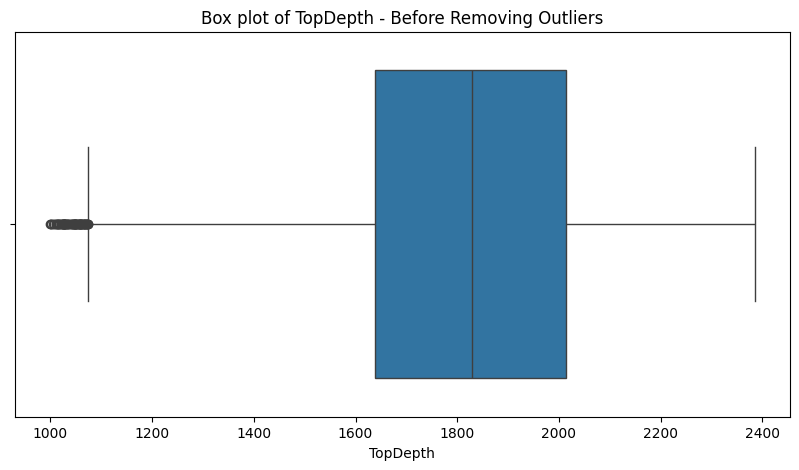

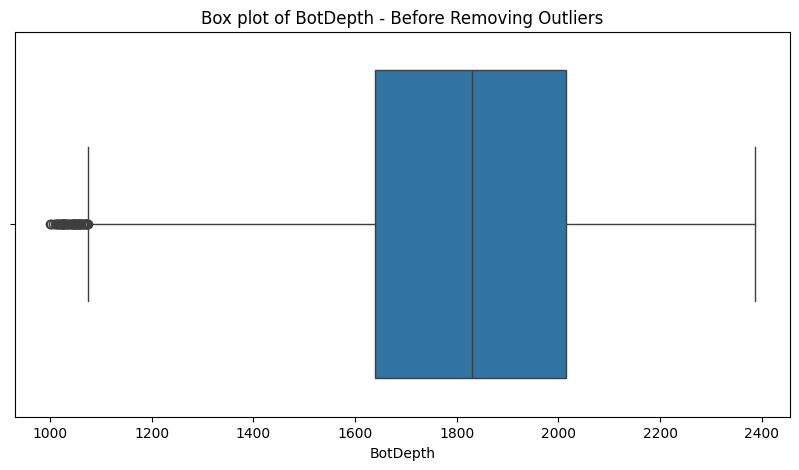

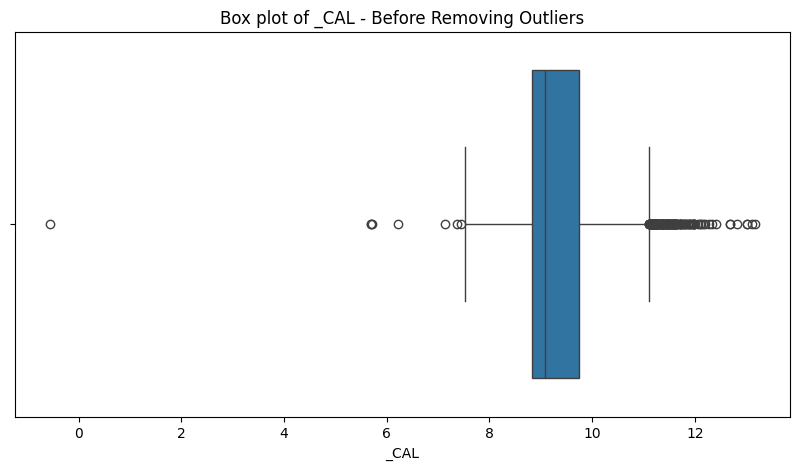

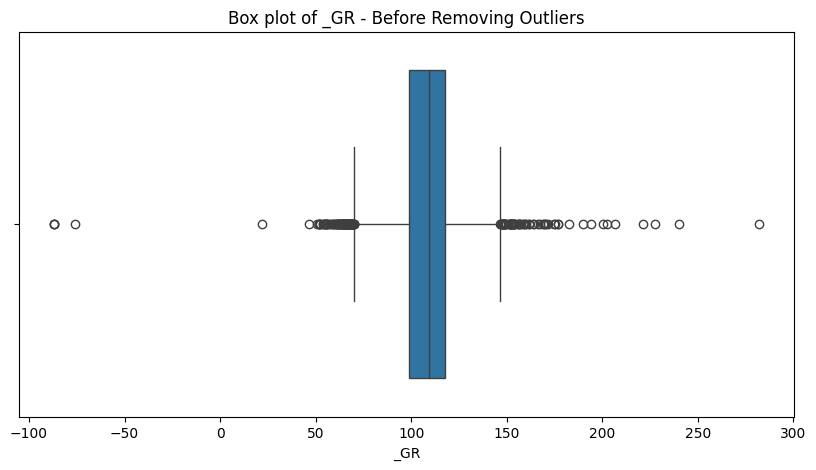

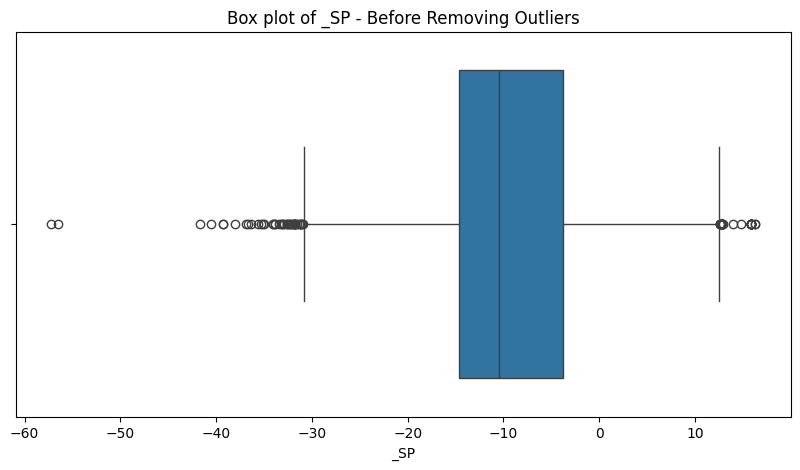

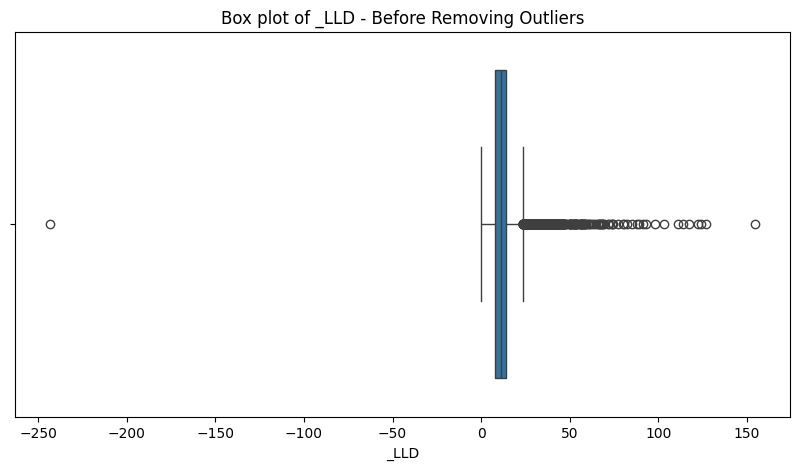

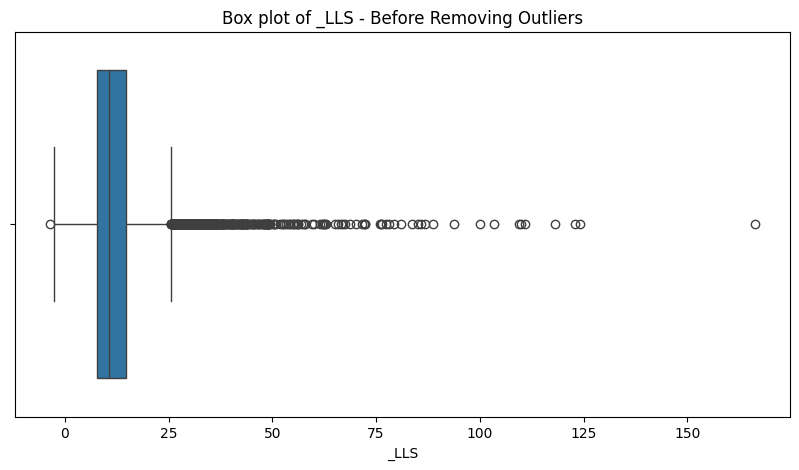

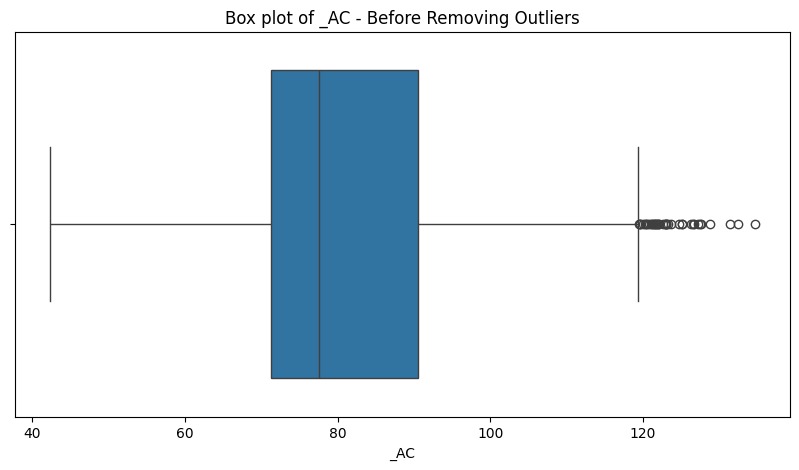

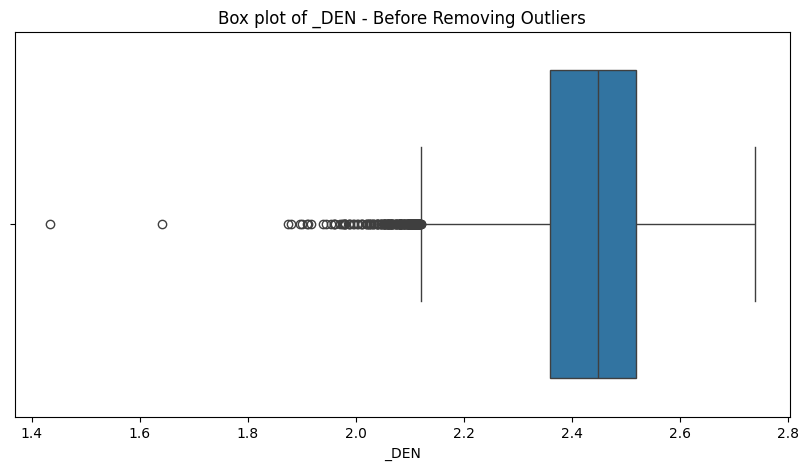

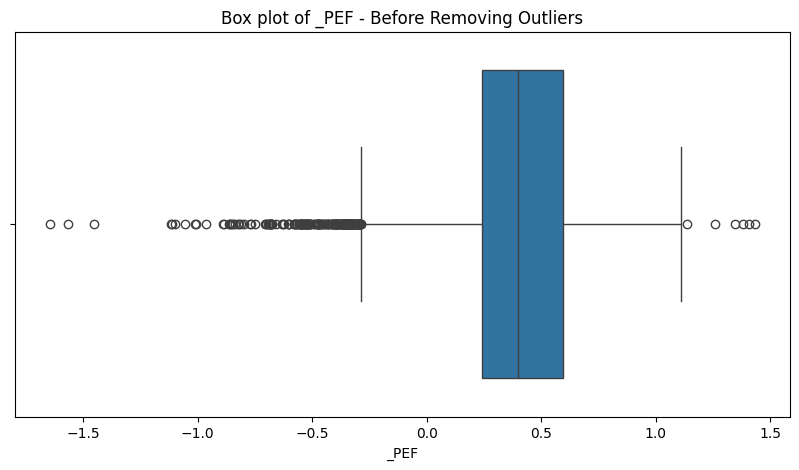

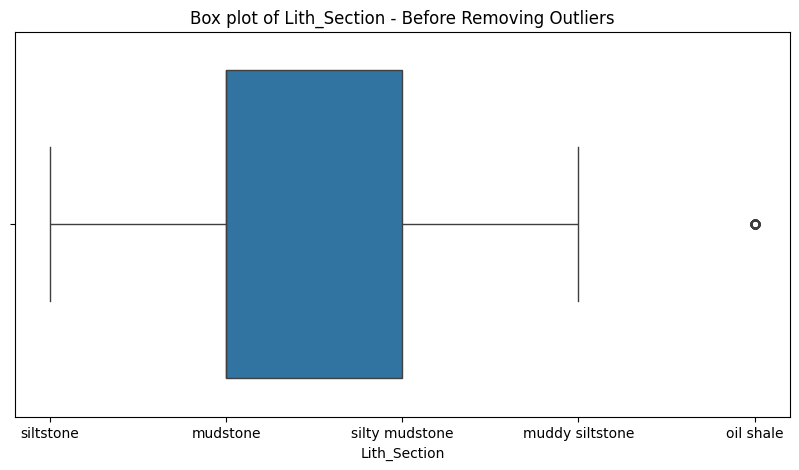

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns

# Function to plot box plots for each column
def plot_boxplots(df, title):
    for column in df.columns:
        plt.figure(figsize=(10, 5))
        sns.boxplot(x=df[column])
        plt.title(f'Box plot of {column} - {title}')
        plt.show()

# Visualize outliers before removing
plot_boxplots(lithology_df, 'Before Removing Outliers')

In [8]:
from scipy import stats

# Calculate z-scores for each column
z_scores = stats.zscore(lithology_df[['TopDepth', 'BotDepth', '_CAL', '_GR', '_SP', '_LLD', '_LLS', '_AC', '_DEN', '_PEF']])
outliers_z = (abs(z_scores) > 3).any(axis=1)
outliers_df_z = lithology_df[outliers_z]
print(outliers_df_z)

      TopDepth  BotDepth      _CAL       _GR       _SP      _LLD       _LLS  \
18     1058.00   1059.00  11.81680  113.2900 -12.84140   4.86814    5.45347   
161    1550.00   1553.50   8.78378  145.8880  -7.36351  91.49800  109.34700   
207    1659.70   1660.30   8.80133  125.8330  -6.45687  24.11340   24.68560   
210    1662.41   1662.63   8.68477  168.7560  -8.19199  14.63090   14.82510   
253    1678.20   1678.50   8.64968  125.4830 -16.25700  41.49820   42.80090   
...        ...       ...       ...       ...       ...       ...        ...   
7403   1990.13   1991.46   8.85215   55.2799 -14.04850  41.00250   61.47370   
7409   1993.92   1994.68   8.84703   76.4069 -13.93510  38.65460   48.82060   
7417   2000.57   2001.90   8.85376   70.8322 -14.01750  51.02870   71.67790   
7419   2002.73   2003.55   8.85145   55.1568 -14.09360  62.45360   72.39790   
7425   2009.33   2010.60   8.84994   61.7175 -13.85440  88.19450   85.12410   

           _AC     _DEN      _PEF Lith_Section  
18

In [9]:
# Calculate IQR for each column
Q1 = lithology_df.quantile(0.25)
Q3 = lithology_df.quantile(0.75)
IQR = Q3 - Q1

# Identify outliers
outliers_iqr = ((lithology_df < (Q1 - 1.5 * IQR)) | (lithology_df > (Q3 + 1.5 * IQR))).any(axis=1)
outliers_df_iqr = lithology_df[outliers_iqr]
print(outliers_df_iqr)

      TopDepth  BotDepth     _CAL       _GR      _SP      _LLD      _LLS  \
0       999.40   1000.60  8.45417   90.9256 -23.2434  11.05550  10.46730   
1      1000.60   1002.00  8.80133  108.8170 -19.9529   8.39451   8.57109   
2      1002.00   1010.20  8.55694   62.4191 -31.7988  15.34740  14.67830   
3      1010.20   1017.60  9.70622  114.2540 -15.4656   6.73380   6.51246   
4      1017.60   1020.00  9.27884   81.7255 -23.4153  10.71210   9.63321   
...        ...       ...      ...       ...      ...       ...       ...   
7429   2012.75   2013.32  8.86009  123.5990 -13.6985  10.52240  14.71400   
7435   2018.46   2019.67  8.85788   80.7557 -13.8184  26.29120  31.60140   
7440   2024.75   2026.08  8.85849   68.4984 -13.8028  22.03990  33.85790   
7445   2029.94   2030.95  8.85497   72.3400 -13.9048  20.15350  30.64900   
7455   2041.52   2042.34  8.84834   97.5118 -13.1143  15.18900  18.38080   

           _AC     _DEN      _PEF     Lith_Section  
0      98.6481  2.10470  0.076631 

C:\Users\DELL\AppData\Local\Temp\ipykernel_16388\2515639915.py:2: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1 = lithology_df.quantile(0.25)
C:\Users\DELL\AppData\Local\Temp\ipykernel_16388\2515639915.py:3: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3 = lithology_df.quantile(0.75)
C:\Users\DELL\AppData\Local\Temp\ipykernel_16388\2515639915.py:7: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  outliers_iqr = ((lithology_df < (Q1 - 1.5 * IQR)) | (lithology_df > (Q3

visualizing outliers!

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


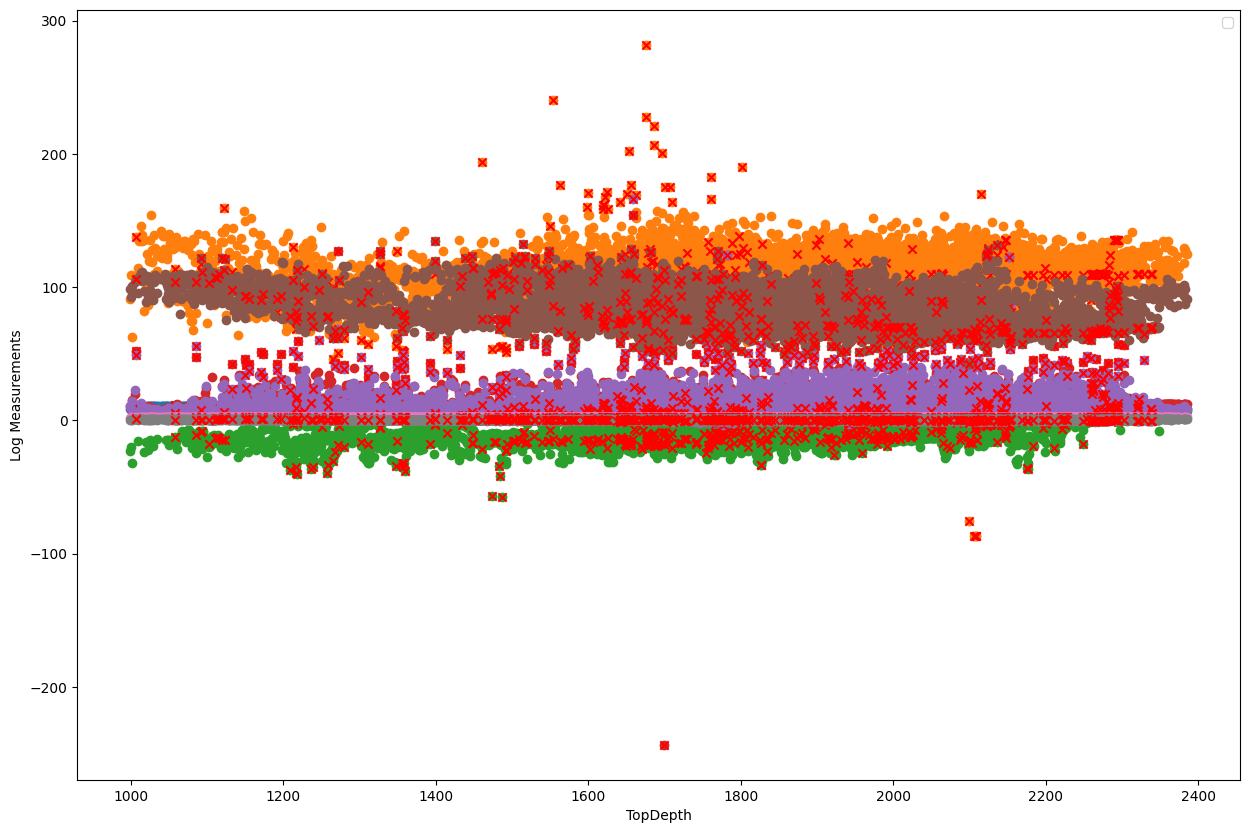

In [11]:
# Plot outliers using scatter plots
plt.figure(figsize=(15, 10))
for col in ['_CAL', '_GR', '_SP', '_LLD', '_LLS', '_AC', '_DEN', '_PEF']:
    plt.scatter(lithology_df['TopDepth'], lithology_df[col], label=col)
    plt.scatter(outliers_df_z['TopDepth'], outliers_df_z[col], color='red', label=f'{col} Outliers', marker='x')
plt.legend()
plt.xlabel('TopDepth')
plt.ylabel('Log Measurements')
plt.show()

removing outliers!

In [13]:
import pandas as pd
from scipy import stats

# Assuming `cleaned_df` is your DataFrame

# Identify outliers using Z-score method
z_scores = stats.zscore(lithology_df[['TopDepth', 'BotDepth', '_CAL', '_GR', '_SP', '_LLD', '_LLS', '_AC', '_DEN', '_PEF']])
outliers_z = (abs(z_scores) > 3).any(axis=1)

# Identify outliers using IQR method
Q1 = lithology_df[['TopDepth', 'BotDepth', '_CAL', '_GR', '_SP', '_LLD', '_LLS', '_AC', '_DEN', '_PEF']].quantile(0.25)
Q3 = lithology_df[['TopDepth', 'BotDepth', '_CAL', '_GR', '_SP', '_LLD', '_LLS', '_AC', '_DEN', '_PEF']].quantile(0.75)
IQR = Q3 - Q1
outliers_iqr = ((lithology_df < (Q1 - 1.5 * IQR)) | (lithology_df > (Q3 + 1.5 * IQR))).any(axis=1)

# Combine the two methods to identify outliers
outliers = outliers_z | outliers_iqr

# Remove outliers from the DataFrame
cleaned_df_no_outliers = lithology_df[~outliers]

# Check the result
print(f"Original dataset shape: {lithology_df.shape}")
print(f"Dataset shape after removing outliers: {cleaned_df_no_outliers.shape}")

# Display first few rows of the cleaned DataFrame
print(cleaned_df_no_outliers)

Original dataset shape: (7470, 11)
Dataset shape after removing outliers: (6132, 11)
      TopDepth  BotDepth     _CAL       _GR      _SP      _LLD      _LLS  \
26     1074.00   1080.00  9.02192  109.3290 -12.6920   6.52008   6.34065   
27     1080.00   1081.50  8.76373   97.1471 -20.6534   9.61726   9.05373   
28     1081.50   1083.00  8.88405  102.4550 -17.6638   9.15654   8.69292   
29     1083.00   1084.00  8.87528  102.1960 -17.9960  11.62310  10.72970   
30     1084.00   1085.40  9.35780  101.8340 -15.4002   6.72679   6.96699   
...        ...       ...      ...       ...      ...       ...       ...   
7465   2052.33   2052.89  8.84020   95.6815 -13.1131   6.48417   6.60710   
7466   2052.89   2053.33  8.84070   95.6815 -13.1113   8.09886   6.66683   
7467   2053.33   2053.77  8.83839   95.6815 -13.1114  14.01430  18.86530   
7468   2053.77   2055.66  8.83146   95.6815 -13.1101   8.48633   4.01874   
7469   2055.66   2056.16  8.82965   95.6815 -13.1120  13.13130  14.50490   

  

C:\Users\DELL\AppData\Local\Temp\ipykernel_16388\439236408.py:14: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  outliers_iqr = ((lithology_df < (Q1 - 1.5 * IQR)) | (lithology_df > (Q3 + 1.5 * IQR))).any(axis=1)


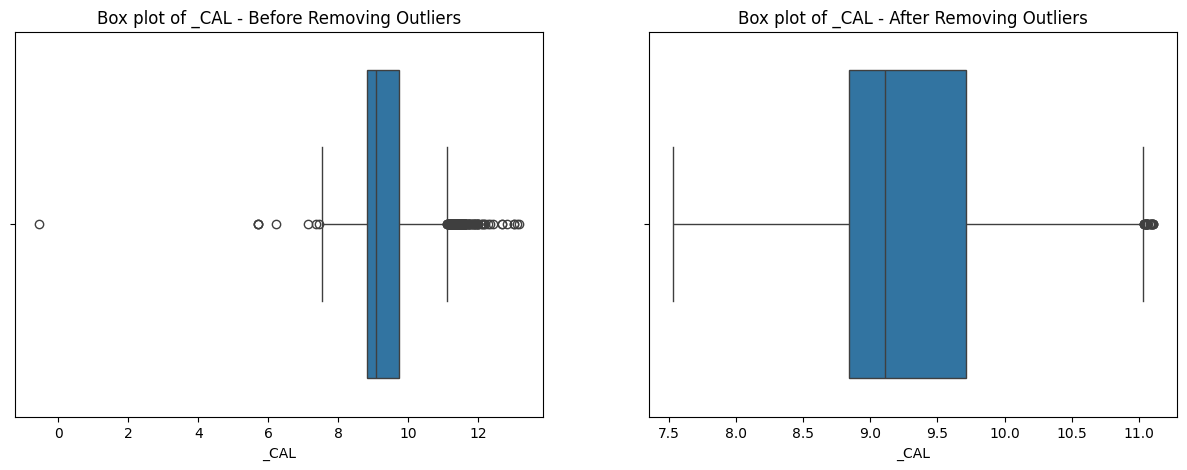

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure with two subplots side by side
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

# Box plot before removing outliers
sns.boxplot(x=lithology_df['_CAL'], ax=axes[0])
axes[0].set_title('Box plot of _CAL - Before Removing Outliers')

# Box plot after removing outliers
sns.boxplot(x=cleaned_df_no_outliers['_CAL'], ax=axes[1])
axes[1].set_title('Box plot of _CAL - After Removing Outliers')

# Display the plots
plt.show()

CORRELATIONS!!

In [14]:
import pandas as pd

# Assuming `cleaned_df_no_outliers` is your DataFrame after removing outliers

# Check for missing values
print(cleaned_df_no_outliers.isna().sum())

# Drop or fill missing values if any
# cleaned_df_no_outliers = cleaned_df_no_outliers.dropna()  # or use fillna() to impute

TopDepth        0
BotDepth        0
_CAL            0
_GR             0
_SP             0
_LLD            0
_LLS            0
_AC             0
_DEN            0
_PEF            0
Lith_Section    0
dtype: int64


In [15]:
# Select numerical columns for correlation
numerical_columns = ['TopDepth', 'BotDepth', '_CAL', '_GR', '_SP', '_LLD', '_LLS', '_AC', '_DEN', '_PEF']

# Compute correlation matrix
correlation_matrix = cleaned_df_no_outliers[numerical_columns].corr()

# Display correlation matrix
print(correlation_matrix)

          TopDepth  BotDepth      _CAL       _GR       _SP      _LLD  \
TopDepth  1.000000  0.999949 -0.279115  0.185612  0.386087  0.245905   
BotDepth  0.999949  1.000000 -0.278696  0.185968  0.386602  0.244882   
_CAL     -0.279115 -0.278696  1.000000  0.254732  0.064748 -0.396330   
_GR       0.185612  0.185968  0.254732  1.000000  0.286727 -0.427216   
_SP       0.386087  0.386602  0.064748  0.286727  1.000000 -0.032438   
_LLD      0.245905  0.244882 -0.396330 -0.427216 -0.032438  1.000000   
_LLS      0.270459  0.269381 -0.425043 -0.402735 -0.052741  0.886533   
_AC      -0.289724 -0.288874  0.373608  0.300309  0.086904 -0.512693   
_DEN      0.582341  0.581886 -0.467112  0.051835  0.267129  0.359520   
_PEF     -0.057725 -0.058009  0.418077  0.104430  0.121131 -0.010265   

              _LLS       _AC      _DEN      _PEF  
TopDepth  0.270459 -0.289724  0.582341 -0.057725  
BotDepth  0.269381 -0.288874  0.581886 -0.058009  
_CAL     -0.425043  0.373608 -0.467112  0.418077  
_GR

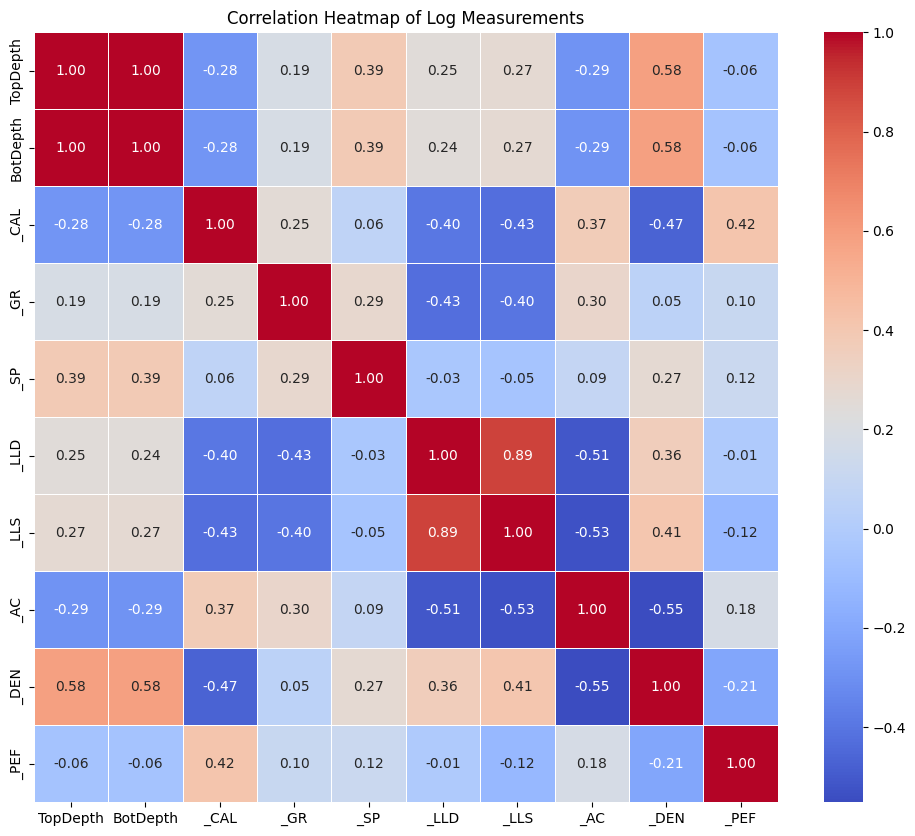

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap of Log Measurements')
plt.show()

In [17]:
# Group by lithology and compute mean log values
lithology_means = cleaned_df_no_outliers.groupby('Lith_Section').mean()

# Display mean log values for each lithology
print(lithology_means)

                    TopDepth     BotDepth      _CAL         _GR        _SP  \
Lith_Section                                                                 
muddy siltstone  1860.474629  1861.415730  9.099613  103.782002  -9.166052   
mudstone         1813.510153  1815.087606  9.452273  114.678084  -8.241496   
oil shale        1595.252456  1596.757719  9.322337  109.802367  -7.533487   
siltstone        1791.212315  1792.315747  8.919692   97.110618 -12.347704   
silty mudstone   1805.374619  1806.423359  9.312777  109.240305  -8.676073   

                      _LLD       _LLS         _AC      _DEN      _PEF  
Lith_Section                                                           
muddy siltstone  13.058898  13.399473   74.856915  2.471280  0.402524  
mudstone          9.132451   8.701862   86.095667  2.416059  0.420570  
oil shale        12.741681  13.370142  101.878111  2.341402  0.497401  
siltstone        15.789529  16.297075   73.854715  2.441463  0.367415  
silty mudstone   10.9

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


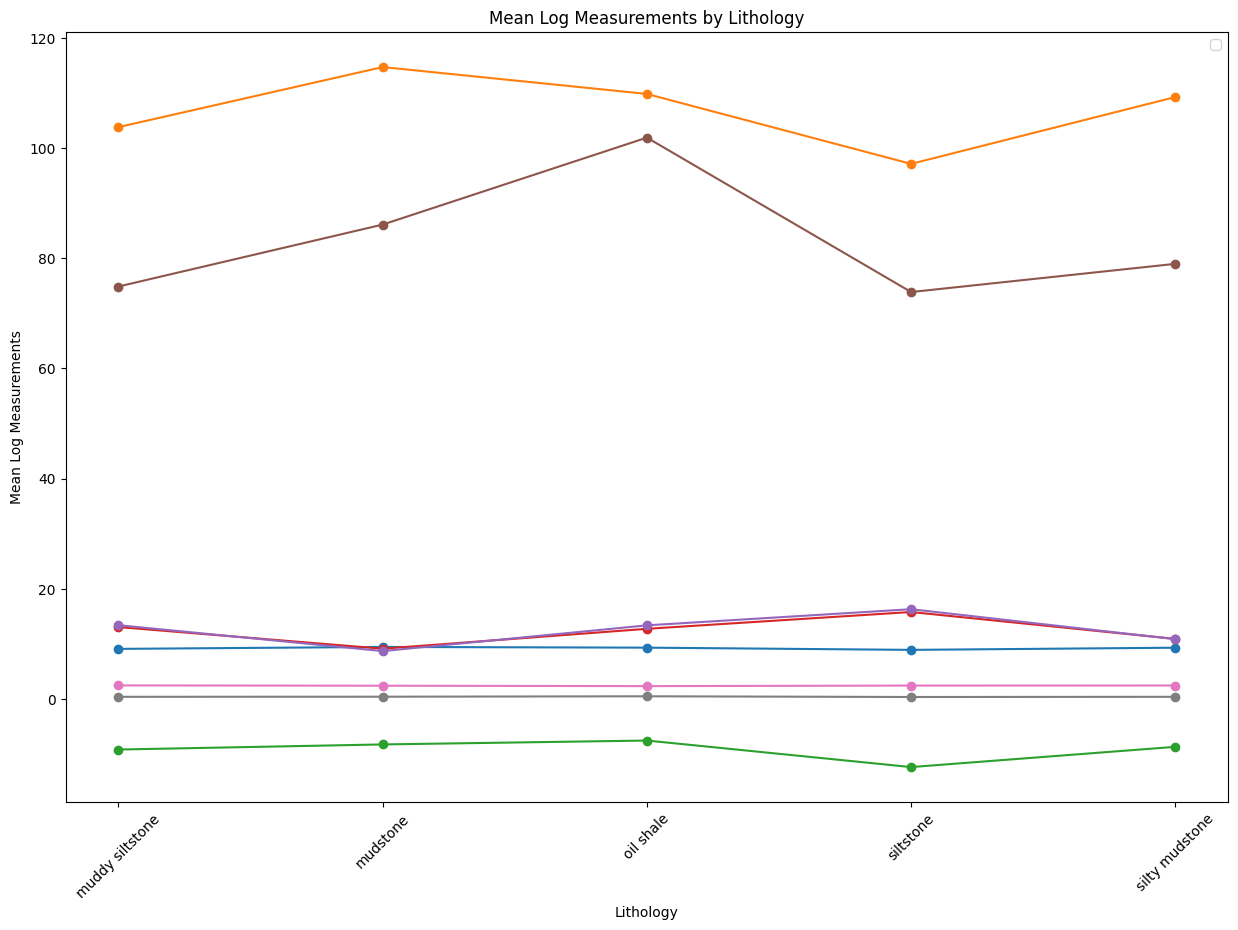

In [18]:
# Plotting log measurements for each lithology
plt.figure(figsize=(15, 10))

for col in numerical_columns[2:]:  # Exclude depth columns
    plt.plot(lithology_means.index, lithology_means[col], marker='o', label=col)

plt.xticks(rotation=45)
plt.xlabel('Lithology')
plt.ylabel('Mean Log Measurements')
plt.title('Mean Log Measurements by Lithology')
plt.legend()
plt.show()

LITHOLOGY CLASSIFICATION MODELS!!

In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Assuming `cleaned_df_no_outliers` is your DataFrame after removing outliers

# Encode the lithology labels
label_encoder = LabelEncoder()
cleaned_df_no_outliers['Lith_Section_Encoded'] = label_encoder.fit_transform(cleaned_df_no_outliers['Lith_Section'])

# Select features and target variable
features = cleaned_df_no_outliers[['TopDepth', 'BotDepth', '_CAL', '_GR', '_SP', '_LLD', '_LLS', '_AC', '_DEN', '_PEF']]
target = cleaned_df_no_outliers['Lith_Section_Encoded']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)

# Standardize the feature values
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

C:\Users\DELL\AppData\Local\Temp\ipykernel_16388\4100199691.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df_no_outliers['Lith_Section_Encoded'] = label_encoder.fit_transform(cleaned_df_no_outliers['Lith_Section'])


In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [47]:
# Logistic Regression
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train_scaled, y_train)
y_pred_lr = lr_model.predict(X_test_scaled)
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_lr))
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.37      0.20      0.26       278
           1       0.66      0.93      0.77       927
           2       0.67      0.21      0.32        19
           3       0.57      0.61      0.59       270
           4       0.22      0.05      0.08       346

    accuracy                           0.60      1840
   macro avg       0.50      0.40      0.40      1840
weighted avg       0.52      0.60      0.53      1840

Logistic Regression Accuracy: 0.6010869565217392


In [42]:
# Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=50)
dt_model.fit(X_train_scaled, y_train)
y_pred_dt = dt_model.predict(X_test_scaled)
print("Decision Tree Classification Report:")
print(classification_report(y_test, y_pred_dt))
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))

Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.30      0.28      0.29       278
           1       0.70      0.72      0.71       927
           2       0.27      0.21      0.24        19
           3       0.52      0.51      0.51       270
           4       0.29      0.29      0.29       346

    accuracy                           0.54      1840
   macro avg       0.42      0.40      0.41      1840
weighted avg       0.53      0.54      0.54      1840

Decision Tree Accuracy: 0.5385869565217392


In [34]:
# Random Forest Classifier
rf_model = RandomForestClassifier(random_state=45)
rf_model.fit(X_train_scaled, y_train)
y_pred_rf = rf_model.predict(X_test_scaled)
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.42      0.33      0.37       278
           1       0.73      0.89      0.80       927
           2       0.50      0.11      0.17        19
           3       0.62      0.64      0.63       270
           4       0.42      0.25      0.31       346

    accuracy                           0.64      1840
   macro avg       0.54      0.44      0.46      1840
weighted avg       0.60      0.64      0.61      1840

Random Forest Accuracy: 0.6396739130434783


In [48]:
# Create a DataFrame to summarize results
results = pd.DataFrame({
    'Model': ['Logistic Regression', 'Decision Tree', 'Random Forest'],
    'Accuracy': [accuracy_score(y_test, y_pred_lr), accuracy_score(y_test, y_pred_dt), accuracy_score(y_test, y_pred_rf)]
})

print(results)

                 Model  Accuracy
0  Logistic Regression  0.601087
1        Decision Tree  0.538587
2        Random Forest  0.639674


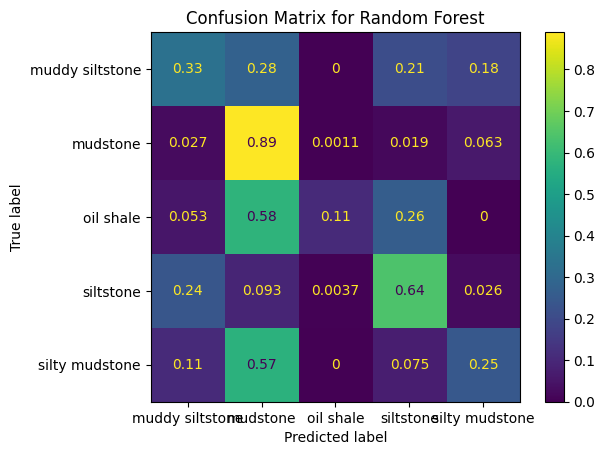

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import ConfusionMatrixDisplay

# Plot confusion matrix for Random Forest (best performer)
ConfusionMatrixDisplay.from_estimator(rf_model, X_test_scaled, y_test, display_labels=label_encoder.classes_, cmap='viridis', normalize='true')
plt.title('Confusion Matrix for Random Forest')
plt.show()

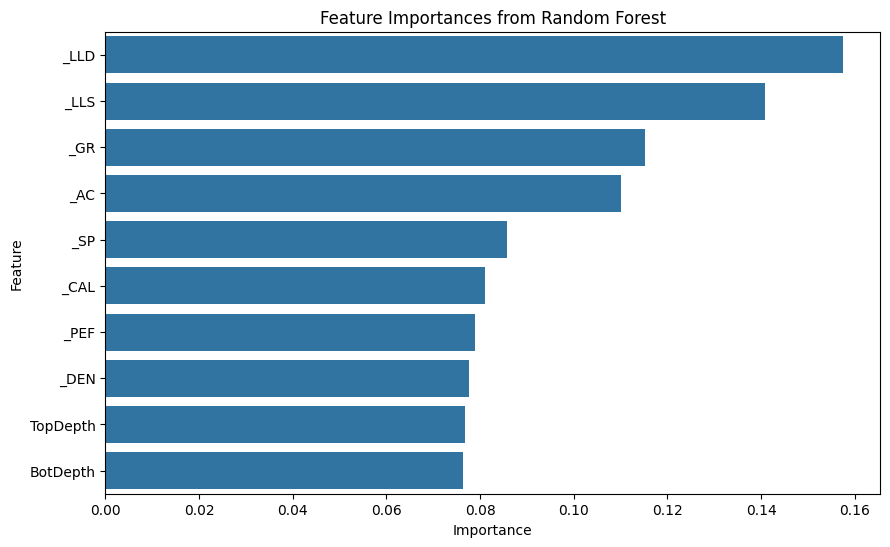

In [50]:
# Get feature importances from the Random Forest model
importances = rf_model.feature_importances_
feature_names = features.columns

# Create a DataFrame for better visualization
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importances from Random Forest')
plt.show()

In [52]:
!pip install xgboost


[notice] A new release of pip is available: 24.1 -> 24.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [53]:
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import pandas as pd

In [54]:
# Assuming `cleaned_df_no_outliers` is your DataFrame after removing outliers

# Encode the lithology labels
label_encoder = LabelEncoder()
cleaned_df_no_outliers['Lith_Section_Encoded'] = label_encoder.fit_transform(cleaned_df_no_outliers['Lith_Section'])

# Select features and target variable
features = cleaned_df_no_outliers[['TopDepth', 'BotDepth', '_CAL', '_GR', '_SP', '_LLD', '_LLS', '_AC', '_DEN', '_PEF']]
target = cleaned_df_no_outliers['Lith_Section_Encoded']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)

# Standardize the feature values
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

C:\Users\DELL\AppData\Local\Temp\ipykernel_16388\3218615553.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df_no_outliers['Lith_Section_Encoded'] = label_encoder.fit_transform(cleaned_df_no_outliers['Lith_Section'])


In [55]:
# Initialize the XGBoost classifier
xgb_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='mlogloss')

# Fit the model on the training data
xgb_model.fit(X_train_scaled, y_train)

# Make predictions on the test data
y_pred_xgb = xgb_model.predict(X_test_scaled)

# Evaluate the model
print("XGBoost Classification Report:")
print(classification_report(y_test, y_pred_xgb))
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))

c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\core.py:158: UserWarning: [10:53:21] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.39      0.30      0.34       278
           1       0.73      0.86      0.79       927
           2       0.67      0.21      0.32        19
           3       0.63      0.61      0.62       270
           4       0.34      0.26      0.30       346

    accuracy                           0.62      1840
   macro avg       0.55      0.45      0.47      1840
weighted avg       0.59      0.62      0.60      1840

XGBoost Accuracy: 0.6179347826086956


In [58]:
# Define the parameter grid for grid search
param_grid = {
    'n_estimators': [50, 100],  # reduced from [50, 100, 200]
    'max_depth': [3, 5],  # reduced from [3, 5, 7, 10]
    'learning_rate': [0.05, 0.1],  # reduced from [0.01, 0.05, 0.1, 0.2]
    'subsample': [0.8, 1.0],  # reduced from [0.6, 0.8, 1.0]
    'colsample_bytree': [0.8, 1.0]  # reduced from [0.6, 0.8, 1.0]
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='mlogloss'),
                           param_grid, cv=5, n_jobs=-1, verbose=2)

# Fit grid search
grid_search.fit(X_train_scaled, y_train)

# Get the best model
best_xgb_model = grid_search.best_estimator_
print("Best parameters found:", grid_search.best_params_)

# Evaluate the best model
y_pred_best_xgb = best_xgb_model.predict(X_test_scaled)
print("Optimized XGBoost Classification Report:")
print(classification_report(y_test, y_pred_best_xgb))
print("Optimized XGBoost Accuracy:", accuracy_score(y_test, y_pred_best_xgb))

Fitting 5 folds for each of 32 candidates, totalling 160 fits


c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:34:03] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best parameters found: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 50, 'subsample': 0.8}
Optimized XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.41      0.30      0.35       278
           1       0.70      0.90      0.79       927
           2       0.67      0.21      0.32        19
           3       0.62      0.64      0.63       270
           4       0.42      0.19      0.26       346

    accuracy                           0.63      1840
   macro avg       0.56      0.45      0.47      1840
weighted avg       0.59      0.63      0.59      1840

Optimized XGBoost Accuracy: 0.6309782608695652
